emp_title
Job title.

emp_length
Number of years in the job, rounded down. If longer than 10 years, then this is represented by the value 10.

state
Two-letter state code.

home_ownership
The ownership status of the applicant's residence.

annual_income
Annual income.

verified_income
Type of verification of the applicant's income.

debt_to_income
Debt-to-income ratio.

annual_income_joint
If this is a joint application, then the annual income of the two parties applying.

verification_income_joint
Type of verification of the joint income.

debt_to_income_joint
Debt-to-income ratio for the two parties.

delinq_2y
Delinquencies on lines of credit in the last 2 years.

months_since_last_delinq
Months since the last delinquency.

earliest_credit_line
Year of the applicant's earliest line of credit

inquiries_last_12m
Inquiries into the applicant's credit during the last 12 months.

total_credit_lines
Total number of credit lines in this applicant's credit history.

open_credit_lines
Number of currently open lines of credit.

total_credit_limit
Total available credit, e.g. if only credit cards, then the total of all the credit limits. This excludes a mortgage.

total_credit_utilized
Total credit balance, excluding a mortgage.

num_collections_last_12m
Number of collections in the last 12 months. This excludes medical collections.

num_historical_failed_to_pay
The number of derogatory public records, which roughly means the number of times the applicant failed to pay.

months_since_90d_late
Months since the last time the applicant was 90 days late on a payment.

current_accounts_delinq
Number of accounts where the applicant is currently delinquent.

total_collection_amount_ever
The total amount that the applicant has had against them in collections.

current_installment_accounts
Number of installment accounts, which are (roughly) accounts with a fixed payment amount and period. A typical example might be a 36-month car loan.

accounts_opened_24m
Number of new lines of credit opened in the last 24 months.

months_since_last_credit_inquiry
Number of months since the last credit inquiry on this applicant.

num_satisfactory_accounts
Number of satisfactory accounts.

num_accounts_120d_past_due
Number of current accounts that are 120 days past due.

num_accounts_30d_past_due
Number of current accounts that are 30 days past due.

num_active_debit_accounts
Number of currently active bank cards.

total_debit_limit
Total of all bank card limits.

num_total_cc_accounts
Total number of credit card accounts in the applicant's history.

num_open_cc_accounts
Total number of currently open credit card accounts.

num_cc_carrying_balance
Number of credit cards that are carrying a balance.

num_mort_accounts
Number of mortgage accounts.

account_never_delinq_percent
Percent of all lines of credit where the applicant was never delinquent.

tax_liens
a numeric vector

public_record_bankrupt
Number of bankruptcies listed in the public record for this applicant.

loan_purpose
The category for the purpose of the loan.

application_type
The type of application: either individual or joint.

loan_amount
The amount of the loan the applicant received.

term
The number of months of the loan the applicant received.

interest_rate
Interest rate of the loan the applicant received.

installment
Monthly payment for the loan the applicant received.

grade
Grade associated with the loan.

sub_grade
Detailed grade associated with the loan.

issue_month
Month the loan was issued.

loan_status
Status of the loan.

initial_listing_status
Initial listing status of the loan. (I think this has to do with whether the lender provided the entire loan or if the loan is across multiple lenders.)

disbursement_method
Dispersement method of the loan.

balance
Current balance on the loan.

paid_total
Total that has been paid on the loan by the applicant.

paid_principal
The difference between the original loan amount and the current balance on the loan.

paid_interest
The amount of interest paid so far by the applicant.

paid_late_fees
Late fees paid by the applicant

In [1]:
import pandas as p
import numpy as n
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=p.read_csv('loans_full_schema.csv')
data.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [3]:
data.emp_title.nunique()

4741

In [4]:
data.emp_title.value_counts()

manager                     218
owner                       204
teacher                     201
driver                      123
sales                        97
                           ... 
corporate tax director        1
captain-fire department       1
intervention specialist       1
coffee roaster                1
toolmaker                     1
Name: emp_title, Length: 4741, dtype: int64

In [5]:
data.homeownership.nunique()

3

<AxesSubplot:>

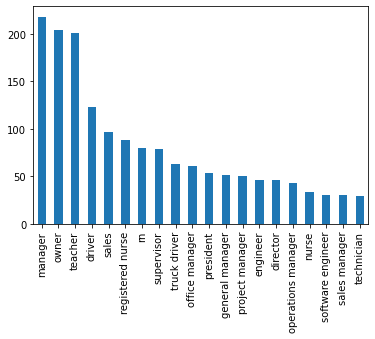

In [6]:
data.emp_title.value_counts().head(20).plot(kind='bar')

In [7]:
data.homeownership.value_counts()

MORTGAGE    4789
RENT        3858
OWN         1353
Name: homeownership, dtype: int64

In [8]:
data.annual_income.max()

2300000.0

In [9]:
data.annual_income.min()

0.0

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='annual_income', ylabel='Density'>

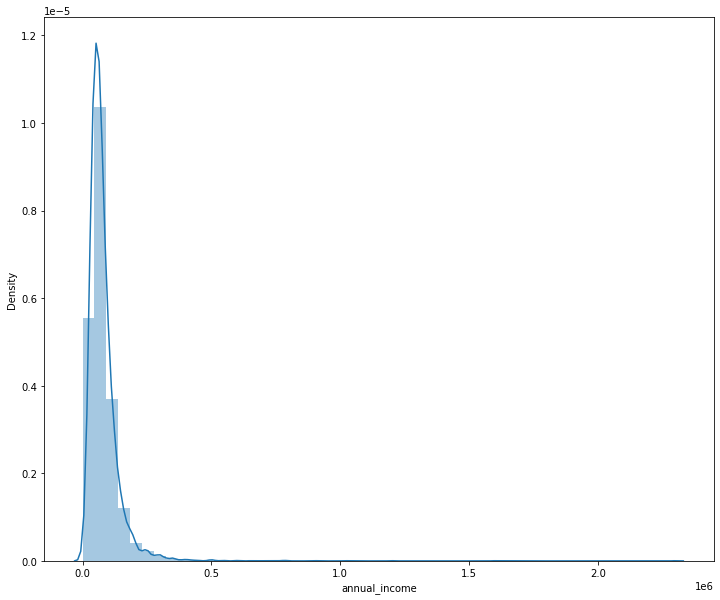

In [10]:
plt.figure(figsize=(12,10))
sns.distplot(data.annual_income)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [12]:
data.shape

(10000, 55)

In [13]:
data.total_credit_lines

0       28
1       30
2       31
3        4
4       22
        ..
9995    44
9996    28
9997    18
9998    38
9999    15
Name: total_credit_lines, Length: 10000, dtype: int64

In [14]:
data.verified_income.value_counts()

Source Verified    4116
Not Verified       3594
Verified           2290
Name: verified_income, dtype: int64

In [15]:
test=data.dropna()

In [16]:
test.shape

(201, 55)

In [17]:
data.head().transpose()

,0,1,2,3,4
emp_title,global config engineer,warehouse office clerk,assembly,customer service,security supervisor
emp_length,3.0,10.0,3.0,1.0,10.0
state,NJ,HI,WI,PA,CA
homeownership,MORTGAGE,RENT,RENT,RENT,RENT
annual_income,90000.0,40000.0,40000.0,30000.0,35000.0
verified_income,Verified,Not Verified,Source Verified,Not Verified,Verified
debt_to_income,18.01,5.04,21.15,10.16,57.96
annual_income_joint,NaN,NaN,NaN,NaN,57000.0
verification_income_joint,NaN,NaN,NaN,NaN,Verified
debt_to_income_joint,NaN,NaN,NaN,NaN,37.66


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='interest_rate', ylabel='Density'>

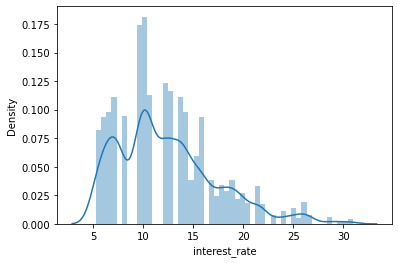

In [18]:
sns.distplot(data.interest_rate)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_income', ylabel='interest_rate'>

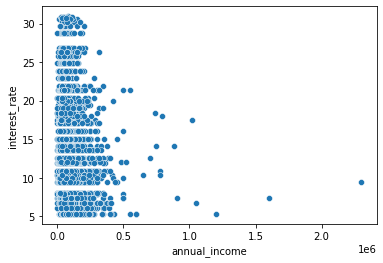

In [19]:
sns.scatterplot(data.annual_income,data.interest_rate)

In [20]:
data.debt_to_income.max()

469.09

In [21]:
n.percentile(data.debt_to_income,67)

nan

In [22]:
data.debt_to_income.quantile(q=0.99)

58.6275

<AxesSubplot:ylabel='debt_to_income'>

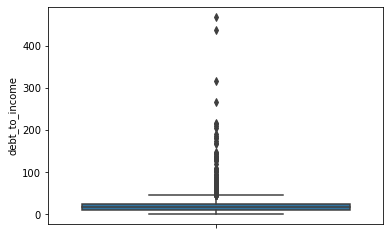

In [23]:
sns.boxplot(y=data.debt_to_income)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delinq_2y', ylabel='Density'>

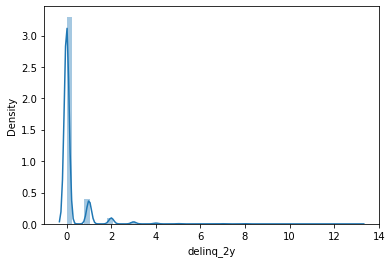

In [24]:
sns.distplot(data.delinq_2y)

In [25]:
data[~data.annual_income_joint.isna()][['annual_income','annual_income_joint']]

,annual_income,annual_income_joint
4,35000.0,57000.0
6,35000.0,155000.0
21,42000.0,95000.0
32,50000.0,101000.0
37,70000.0,105000.0
...,...,...
9981,64000.0,194000.0
9984,49000.0,99000.0
9987,55000.0,100000.0
9991,75000.0,210000.0


In [26]:
data.loan_amount.min()

1000

In [27]:
data.public_record_bankrupt.value_counts()

0    8785
1    1195
2      17
3       3
Name: public_record_bankrupt, dtype: int64

In [28]:
data[data.public_record_bankrupt==0].interest_rate.mean()

12.338004553215765

In [30]:
data[data.public_record_bankrupt==3].interest_rate.mean()

13.126666666666665

<AxesSubplot:xlabel='public_record_bankrupt'>

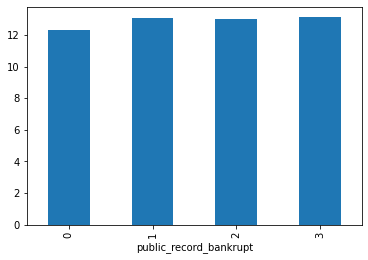

In [31]:
data.groupby('public_record_bankrupt').interest_rate.mean().plot(kind='bar')

In [32]:
data.verification_income_joint.value_counts()

Not Verified       611
Source Verified    499
Verified           345
Name: verification_income_joint, dtype: int64

In [33]:
data[~data.verification_income_joint.isna()][['annual_income','annual_income_joint','verified_income','verification_income_joint']]

,annual_income,annual_income_joint,verified_income,verification_income_joint
4,35000.0,57000.0,Verified,Verified
6,35000.0,155000.0,Source Verified,Not Verified
21,42000.0,95000.0,Source Verified,Source Verified
32,50000.0,101000.0,Verified,Verified
37,70000.0,105000.0,Verified,Verified
...,...,...,...,...
9981,64000.0,194000.0,Not Verified,Not Verified
9984,49000.0,99000.0,Source Verified,Source Verified
9987,55000.0,100000.0,Source Verified,Not Verified
9991,75000.0,210000.0,Source Verified,Source Verified


In [34]:
data.debt_to_income.mean()

19.308191659983976

In [35]:
data.debt_to_income.max()

469.09

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_income'>

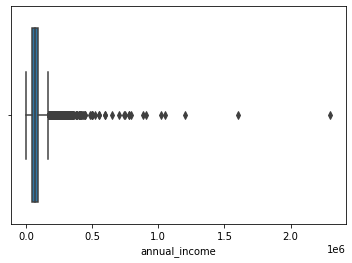

In [36]:
sns.boxplot(data.annual_income)

In [37]:
for i in range(1,101):
    print(data.annual_income.quantile(q=i/100))

13163.76
18000.0
20566.85
24000.0
25000.0
26547.94
28787.200000000004
30000.0
30000.0
32000.0
33000.0
34411.5408
35000.0
35000.0
36417.0
38000.0
39000.0
40000.0
40000.0
40521.60000000003
42000.0
42725.740000000005
44000.0
45000.0
45000.0
46268.56000000001
48000.0
48506.48
50000.0
50000.0
50000.0
50000.0
52000.0
53000.0
54000.0
55000.0
55000.0
56000.0
57000.0
58000.0
60000.0
60000.0
60000.0
60000.0
61000.0
62002.16
64000.0
65000.0
65000.0
65000.0
66000.0
68000.0
69000.0
70000.0
70000.0
70000.0
72000.0
73000.0
75000.0
75000.0
75000.0
77000.0
79000.0
80000.0
80000.0
81000.0
83000.0
85000.0
85000.0
87313.19999999991
90000.0
90000.0
91000.0
93526.00000000003
95000.0
97000.0
100000.0
100000.0
100265.37000000001
104000.0
106000.0
110000.0
110000.0
115000.0
120000.0
120000.0
123000.0
125000.0
130000.0
135000.0
140000.0
150000.0
151534.99999999985
160000.0
175000.0
185000.0
200000.0
240000.0
300000.0
2300000.0


In [38]:
data.annual_income.quantile(q=0.999993)

2251004.9699935894

In [39]:
data[data.debt_to_income.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 154 to 9273
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         1 non-null      object 
 1   emp_length                        1 non-null      float64
 2   state                             24 non-null     object 
 3   homeownership                     24 non-null     object 
 4   annual_income                     24 non-null     float64
 5   verified_income                   24 non-null     object 
 6   debt_to_income                    0 non-null      float64
 7   annual_income_joint               24 non-null     float64
 8   verification_income_joint         22 non-null     object 
 9   debt_to_income_joint              24 non-null     float64
 10  delinq_2y                         24 non-null     int64  
 11  months_since_last_delinq          11 non-null     float64
 12  earlie

In [40]:
data.debt_to_income.median()

17.57

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [42]:
data.months_since_90d_late.value_counts()

34.0     48
45.0     45
60.0     44
72.0     43
67.0     43
         ..
113.0     1
2.0       1
102.0     1
115.0     1
98.0      1
Name: months_since_90d_late, Length: 106, dtype: int64

In [43]:
data[~data.debt_to_income_joint.isna()]\
[['debt_to_income','debt_to_income_joint','verified_income','verification_income_joint']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495 entries, 4 to 9997
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   debt_to_income             1471 non-null   float64
 1   debt_to_income_joint       1495 non-null   float64
 2   verified_income            1495 non-null   object 
 3   verification_income_joint  1455 non-null   object 
dtypes: float64(2), object(2)
memory usage: 58.4+ KB


In [44]:
data[~data.debt_to_income_joint.isna()]\
[['debt_to_income','debt_to_income_joint','verified_income','verification_income_joint']]

,debt_to_income,debt_to_income_joint,verified_income,verification_income_joint
4,57.96,37.66,Verified,Verified
6,23.66,13.12,Source Verified,Not Verified
21,32.00,16.12,Source Verified,Source Verified
32,36.75,20.92,Verified,Verified
37,17.06,13.27,Verified,Verified
...,...,...,...,...
9981,36.49,23.72,Not Verified,Not Verified
9984,36.20,28.29,Source Verified,Source Verified
9987,22.19,30.77,Source Verified,Not Verified
9991,28.45,23.46,Source Verified,Source Verified


In [45]:
t=data[~data.debt_to_income_joint.isna()]\
[['debt_to_income','debt_to_income_joint','verified_income','verification_income_joint']]

In [ ]:
columnList = []
for i in categorical:
    fieldName = i
    nonMissing = df[i].count() * 100 / numrecords
    uniqueValues = len(df[i].unique())
    mode = df[i].mode()[0]
    column = pd.Series({'Field Name':fieldName,'% Populated': nonMissing, '# Unique Values':uniqueValues,'Most Common Value': mode})
    columnList.extend([column])
df_summary_category = pd.DataFrame(columnList).set_index('Field Name').round(2)
df_summary_category['# Unique Values'] = df_summary_category['# Unique Values'].apply('{:,.0f}'.format)
df_summary_category

In [ ]:
numrecords = len(data)
numeric_columns = ['Amount','Date']
countMissingNumeric = df[numeric_columns].apply(lambda x: x.count() * 100 / numrecords)
countMissingNumeric.name = '% Populated'
zeroProportion = df[numeric_columns].apply(lambda x: len(x[x==0]) * 100 / numrecords)
data_describe = df[['Date','Amount']].describe(datetime_is_numeric=True)
data_describe.loc['mean','Date'] = np.nan
data_describe.loc['min','Date'] = data_describe.loc['min','Date'].strftime('%Y-%m-%d')
data_describe.loc['max','Date'] = data_describe.loc['max','Date'].strftime('%Y-%m-%d')
data_describe.loc['25%','Date'] = data_describe.loc['25%','Date'].strftime('%Y-%m-%d')
data_describe.loc['50%','Date'] = data_describe.loc['50%','Date'].strftime('%Y-%m-%d')
data_describe.loc['75%','Date'] = data_describe.loc['75%','Date'].strftime('%Y-%m-%d')

df_summary_numeric = data_describe.T
df_summary_numeric['% Zero'] = zeroProportion
df_summary_numeric['% Populated'] = df_summary_numeric['count']/numrecords*100
df_summary_numeric = df_summary_numeric.filter(['% Populated','min','max','mean','std','% Zero','25%','50%','75%'])
df_summary_numeric.loc['Amount'] = df_summary_numeric.loc['Amount'].apply('{:,.2f}'.format)
df_summary_numeric

In [53]:
data.info()
numeric_columns=['emp_length','annual_income','debt_to_income','annual_income_joint',]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [55]:
categories=['emp_title','homeownership','state','verified_income','verification_income_joint','loan_purpose',\
           'application_type','grade','sub_grade','issue_month','loan_status','initial_listing_status',\
           'disbursement_method']

In [61]:
z=data.copy()
z=z.drop(categories,axis=1)
numeric_columns=z.columns
z.columns

Index(['emp_length', 'annual_income', 'debt_to_income', 'annual_income_joint',
       'debt_to_income_joint', 'delinq_2y', 'months_since_last_delinq',
       'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_amount', 'term', 'interest_rate', 'installment', 'balance',
       'paid_total', '

In [66]:
columnList = []
for i in categories:
    fieldName = i
    nonMissing = data[i].count() * 100 / numrecords
    uniqueValues = len(data[i].unique())
    mode = data[i].mode()[0]
    column = p.Series({'Field Name':fieldName,'% Populated': nonMissing, '# Unique Values':uniqueValues,'Most Common Value': mode})
    columnList.extend([column])
df_summary_category = p.DataFrame(columnList).set_index('Field Name').round(2)
df_summary_category['# Unique Values'] = df_summary_category['# Unique Values'].apply('{:,.0f}'.format)
df_summary_category

,% Populated,# Unique Values,Most Common Value
Field Name,,,
emp_title,91.67,"4,742",manager
homeownership,100.00,3,MORTGAGE
state,100.00,50,CA
verified_income,100.00,3,Source Verified
verification_income_joint,14.55,4,Not Verified
loan_purpose,100.00,12,debt_consolidation
application_type,100.00,2,individual
grade,100.00,7,B
sub_grade,100.00,32,B1


In [83]:
df_summary_category.to_excel('Categorical Variable DQR.xlsx')

In [80]:
columnList = []
for i in numeric_columns:
    fieldName = i
    nonMissing = data[i].count() * 100 / numrecords
    #uniqueValues = len(df[i].unique())
    min_val=data[i].min()
    max_val=data[i].max()
    mean_val=data[i].mean()
    std_val=data[i].std()
    zeroProportion = (data[i]==0).sum()/numrecords*100
    Q1=data[i].quantile(q=0.25)
    Q2=data[i].quantile(q=0.5)
    Q3=data[i].quantile(q=0.75)
    Q4=data[i].quantile(q=0.99)
    Q5=data[i].quantile(q=1)
    column = p.Series({'Field Name':fieldName,'% Populated': nonMissing, \
                        'min':min_val,'max': max_val,'std':std_val,'% zero':zeroProportion,\
                       '25%':Q1,'50%':Q2,'75%':Q3,'99%':Q4,'100%':Q5})
    columnList.extend([column])
df_summary_numeric = p.DataFrame(columnList).set_index('Field Name').round(2)
#df_summary_category['# Unique Values'] = df_summary_category['# Unique Values'].apply('{:,.0f}'.format)
df_summary_numeric

,% Populated,min,max,std,% zero,25%,50%,75%,99%,100%
Field Name,,,,,,,,,,
emp_length,91.83,0.00,10.00,3.70,6.90,2.00,6.00,10.00,10.00,10.00
annual_income,100.00,0.00,2300000.00,64734.29,0.23,45000.00,65000.00,95000.00,300000.00,2300000.00
debt_to_income,99.76,0.00,469.09,15.00,0.28,11.06,17.57,25.00,58.63,469.09
annual_income_joint,14.95,19200.00,1100000.00,70168.38,0.00,86833.50,113000.00,151545.50,383417.84,1100000.00
debt_to_income_joint,14.95,0.32,39.98,8.05,0.00,14.16,19.72,25.50,38.25,39.98
delinq_2y,100.00,0.00,13.00,0.68,85.76,0.00,0.00,0.00,3.00,13.00
months_since_last_delinq,43.42,1.00,118.00,21.63,0.00,19.00,34.00,53.00,81.00,118.00
earliest_credit_line,100.00,1963.00,2015.00,7.80,0.00,1997.00,2003.00,2006.00,2014.00,2015.00
inquiries_last_12m,100.00,0.00,29.00,2.38,30.60,0.00,1.00,3.00,11.00,29.00


In [84]:
df_summary_numeric.to_excel('Numerical Variable DQR.xlsx')